# DSCI 6003 Lecture 2.2 - Intro to Regularization


##By the End of this Lecture you Will:
1. Know the main assumptions and limitations of the OLS - LLS Solution to Regression.
2. Be able to write and use the formulations of Lasso and Ridge Regression.
3. Be familiar with alternate forms of regression
4. Be familiar with standard metrics of success for models.


## A review of the assumptions of OLS

You should be intimately familiar with the fundamentals of OLS (ordinary least squares) - sometimes called LLS (linear least squares). It is the only model that we will discuss that has a closed-form solution for the estimated weights:

$$ \hat{\beta} = (X^{T}X)^{-1}X^{T}y$$

Before proceeding further into regression we should discuss why every regression is not simply an OLS regression. OLS contains within it *six relatively strong assumptions* (this is partially discussed in the last week of 6001 - you should also review those notes):

1. The model is linear with respect to parameters:
$$Y = \hat{\beta_{0}}+\hat{\beta_{1}}x_{1}+\hat{\beta_{2}}x_{2}+ \cdots +\hat{\beta_{n}}x_{n}$$. This is the linearity assumption. The features may be transformed in any way without changing the basic assumption of the model. 

2. It is assumed that the training set is a representative random sample. (for cross sections) This is needed for inference, and sample properties. 

3. There is no **perfect** collinearity between the features. This ensures that $(X^{T}X)^{-1}$ exists.

4. Constant conditional mean. $E(\epsilon|X) = C$ This means that you have properly specified the model such that: there are **no omitted variables**, and the functional form you estimated is correct relative to the (actually unknown) population model. This is always the problematic assumption with OLS, since there is no way to ever know if it is actually valid or not. If $C$ is actually constant but non-zero, then it will be captured by the constant term in the regression.

5. The variance of the error term is constant. This conditional on all $x_{i}$: $Var(\epsilon|X)=\sigma^{2}$ 

6. Normality; the error term $\epsilon$ is independent of the $x_{i}$, and follows $\epsilon=N(0,\sigma^{2})$. This ensures that the sampling distribution of the $\beta_{k}$ is normal, $\hat{\beta_{k}} \approx N(\beta_{k},Var(\hat{\beta_{k}}))$.


A) Under conditions 1-6, the OLS estimate is the BLUE (best linear unbiased estimator) in terms of minimum variance and bias. It is also the minimum variance estimator.

B) Under conditions 1-5, the OLS is still BLUE (but not minimum variance) and efficient.

C) Under 1-4, OLS is unbiased and consistent.


###QUIZ:
How realistic is it to make the above assumptions with respect to real data?


You are responsible to be intimately familiar with the above material related to OLS.

# Introduction to Regularization

## Regularization: Motivations and Methods


You may recall how a large population of $\beta$ coefficients rapidly increases the chances of overfitting a regression model. This leads to tradeoffs in bias and variance, with which you are already quite familiar.

![BV](images/bias_variance_graph.png)

The solution of choice is to apply *regularization* to the regression. Regularization is commonly described as adding a *penalty function* or additional factor to the coefficient matrix of the regression.

This penalty function enables us to regress while forcing the values of the $\beta$ coefficients to be as *small as possible when taken as a whole*. This process is called "shrinkage" of the coefficients. 

**It turns out that the smaller the coefficients of regression are, the more robust the regression itself is. This is because smaller coefficients reduce the strength of effect of any one variable on the regression.**

The definition of what constitutes the "size" of the $\beta$ coefficients *taken as a whole* is what determines the form of the penalty function. In practice, this produces remarkable differences in performance between different types of regularized regressions. 


## A review of p-norms

### $p$-norms

For any $n$-dimensional real or complex vector. i.e. $x \in \mathbb{R}^n \text{ or } \mathbb{C}^n$, and for any real number $p \ge 1$, the __$p$-norm__ or __L$^p$ norm__ is defined as

$$ \|x\|_p = \left(|x_1|^p+|x_2|^p+\dotsb+|x_n|^p\right)^{\frac{1}{p}} $$

$$ \|x\|_p = \begin{pmatrix}\sum_{i=1}^n{|x_i|^p} \end{pmatrix}^{\frac{1}{p}}  \quad \rightarrow Eq. 1 $$ 

If the set $V$ represents a vector space, then the vector space taken together with a norm, $(V,\|.\|)$, is called a __normed vector space__. Given a normed vector space $(V,\|.\|)$ and vectors ${x, y} \in V$, and we define a metric: 

$$ d(x,y) = \|x-y\| $$

For vectors the norm specifies the _length_ of the vector; the calculation of length given by the norm varies based on the type of norm chosen. 

The natural expression of the norm in euclidean space is well known as the Euclidean norm, which is the $L^{2}$ norm:

$\|x\|_{2} = (|x_{1}|^{2}+|x_{2}|^{2}+\ldots+|x_{n}|^{2})^{1/2}$


 The __Unit circle__, or a _norm ball_, of a norm is a unique characteristic of a norm that helps us visualize the norm and understand the shape, or _topology_, of the underlying normed space. The unit circle of an L$^p$-norm in $\mathbb{R}^n$ is given by: 

$$\{ x \in \mathbb{R}^n \ |\  \|x\|_p = 1 \}$$


##**Regularized Regression**

Recall that the process of regression is one in which we project *regressors* onto a set of data. The regressors are a description of a putative set of relationships amongst the features of the data.

One way of doing this is by including the current "size" of the $\beta $ coefficients into the regression itself, by considering them as a vector of length $n$,

$\textbf{$\theta$} = \begin{bmatrix} \beta_{1} \\ \beta_{2} \\ \vdots \\ \beta_{n} \end{bmatrix} $

In other words, we are looking to find a way to *regularize* the relative emphasis of each feature so as to reduce overfitting. One way of doing this is to constrain the p-norm of the $\beta$ coefficients to a maximum possible size. This leads us to **regularized regression**.


###**Hypothesis:**

The variables can be most accurately described as a linear regression, given that we constrain the emphasis of some of the features so that their solutions are made less prone to overfitting.

$$Y = \textbf{$\beta$}^{T}X+\beta_0$$


###**Cost Function:**

$$F(\textbf{$\beta$}) = argmin_\beta((Y-\textbf{$\beta$}^{T}X)^{T}(Y-\textbf{$\beta$}^{T}X)+\lambda\|\textbf{$\beta$}\|)$$


###Optimization:

Most commonly gradient descent, coordinate descent or least-angle regression (LARS), although other optimizations are often used.

###Reasoning:

Shrinking the size of the $\beta$ coefficients makes the regression more robust, and in general,
####**Smaller overall coefficients produce more robust regressions (less bias and variance)**. 
Tradeoffs in the accuracy and utility of regularization methods occur where the features are collinear (a relatively common case).

## $L_{1}$ Regularization: Lasso regression

LASSO: Least Absolute Shrinkage and Selection Operator

### Motivation:

1. Large, sparse datasets
1. Numerous features
1. Only some features likely to be important - uncertain of which ones
1. Little collinearity

### Mode of Action:

1. Beta coefficients with values close to zero and with significant collinearity tend to get dropped ($\beta = 0$).
1. Tends to select only one variable among a set of regressors that have high pairwise correlations with each other.
1. Uses a Laplacian (double exponential) prior for the $\beta$ values.


### Cost Function:

We add an $L^{1}$ p-norm to the least squares equation and look for the values of $\beta$ that satisfy it. This is the same thing as the taxicab or Manhattan distance of the $\beta$ vector. We minimize:

$$F(\textbf{$\beta$}) = argmin_\beta((Y-\textbf{$\beta$}^{T}X)^{T}(Y-\textbf{$\beta$}^{T}X)+\lambda\|\textbf{$\beta$}\|_1)$$ 

(vector form)

$$F(\textbf{$\beta$}) = \sum\limits_{i=1}^n(y_i-\beta_0-\beta_iX)+\lambda \sum\limits_{i=1}^n|\beta_i|$$ 

(functional form)

The size of $\lambda$ determines the "size" of the regularization factor relative to the least squares estimate.

![LR](images/Lasso_Regression.png)

####Blue Square: Region of $|\beta|$ constrained by $\lambda$
####Red Level curves: Optimization funnel plotted as a function of $\beta_1$ vs. $\beta_2$
####$\hat{\textbf{$\beta$}}$:  theoretical absolute minimum of $(Y-\textbf{$\beta$}^{T}X)^{T}(Y-\textbf{$\beta$}^{T}X)$: OLS solution

####Solutions to the cost function are found at the intersection of the red level curves and blue region. We try to minimize the size of both the red circles and blue square simultantously.


Note that Lasso has solutions of the norm on the corners, and so will find cases on the corners quite easily (in high dimensions, this is even more likely for reasons already discussed). When this happens, these $\beta$ coefficients are set to zero. Lasso solutions are not unique. In the case where there are many more regressors than regressands (more features than responses), multiple solutions are common.

## $L_{2}$ Regularization: Ridge regression


###Motivation:

1. General Regression Case.
1. Some features are known to be more important than others.
1. Collinearity is likely to be present.

###Mode of Action:
1. Specifically designed to defeat collinearity.
1. Attempts to shrink the size of the coefficients - "Shrinkage".
1. Uses a Gaussian prior for the $\beta$ values.


###Cost Function:

We add an $L^{2}$ p-norm to the least squares equation and look for the values of $\beta$ that satisfy it. This is the same thing as the Euclidean length of the $\beta$ vector. We minimize:

$$F(\textbf{$\beta$}) = argmin_\beta((Y-\textbf{$\beta$}^{T}X)^{T}(Y-\textbf{$\beta$}^{T}X)+\lambda\|\textbf{$\beta$}\|_2)$$ 

(vector form)

$$F(\textbf{$\beta$}) = \sum\limits_{i=1}^n(y_i-\beta_0-\beta_iX)+\lambda \sum\limits_{i=1}^n\beta_i^{2}$$ 

(functional form)

The size of $\lambda$ determines the "size" of the regularization factor relative to the least squares estimate.


![RR](images/Ridge_Regression.png)

#### Blue Square: Region of $|\beta|$ constrained by $\lambda$
#### Red Level curves: Cost gradient plotted as a function of $\beta_1$ vs. $\beta_2$
#### $\hat{\textbf{$\beta$}}$:  theoretical absolute minimum of $(Y-\textbf{$\beta$}^{T}X)^{T}(Y-\textbf{$\beta$}^{T}X)$: OLS solution

#### Solutions to the cost function are found at the intersection of the red level curves and blue region. We try to minimize the size of both the red circles and blue circle simultantously.

Ridge can find solutions away from the axes, and so is less likely to find solutions for $\beta$ equal to zero. However, the shape of the norm encourages the minimization of the size of the $\beta$ coefficients. It should be obvious from the figure that the larger of the area of the circle, the more likely we will find solutions with small $\beta_2$. This principle is generalizable to many dimensions.

## $L_{3/2}$ Regularization: Elastic Net regression 

### (often called enet)


### Motivation:

1. Cases where both Lasso is useful but may have collinearity between features
1. Enables the benefit of coefficient shrinkage along with the ability to select features

### Mode of Action:
1. Specifically designed to enable feature selection without dropping groups of correlated features
1. Attempts to shrink the size of the coefficients - "Shrinkage"


### Cost Function:

We add both a $L^{1}$ and $L^{2}$ p-norm to the least squares equation and look for the values of $\beta$ that satisfy it. We minimize:

$$F(\textbf{$\beta$}) = argmin_\beta((Y-\textbf{$\beta$}^{T}X)^{T}(Y-\textbf{$\beta$}^{T}X)+\lambda_2\|\textbf{$\beta$}\|_2+\lambda_1\|\textbf{$\beta$}\|_1)$$ 

(vector form)

$$F(\textbf{$\beta$}) = \sum\limits_{i=1}^n(\beta_iX-y_i-b_0)+\lambda_2 \sum\limits_{i=1}^n\beta_i^{2}+\lambda_1 \sum\limits_{i=1}^n|\beta_i|$$ 

(explicit form)

The size of $\lambda$ determines the "size" of the regularization factor relative to the least squares estimate. Commonly there is another hyperparameter that determines a ratio between $L^{1}$ and $L^{2}$.

In **most** implementations, the two $\lambda$ coefficients are combined into one coefficient, called $\alpha$, where $\alpha = \frac{\lambda_2}{\lambda_2+\lambda_1}$, giving a weighted formulation dependent on $\alpha$:

$$F(\textbf{$\beta$}) = argmin_\beta((Y-\textbf{$\beta$}^{T}X)^{T}(Y-\textbf{$\beta$}^{T}X)+\alpha\|\textbf{$\beta$}\|_2+(1-\alpha)\|\textbf{$\beta$}\|_1)$$ 



# A Summary of the Different Norms

We can characterise the properties and behaviors of each of the above methods by observing the shapes of the penalty region. Returning to the above figure, we can imagine the intersection of the level curves of the optimization surface with the penalty region as being dependent on the penalty region's shape.

![normT](images/elasticnet2.png)

####Dotted line: $L^{2}$; Dashed line: $L^{1}$; Solid line: $L^{3/2}$

1. The $L^{1}$ norm is very strict in terms of solutions, and tends to favor dropping small coefficients to 0 due to the corners. **SELECTION**
1. Solutions to the $L^{2}$ norm allow for solutions closer to the optimum RSS while allowing for good shrinkage. However, small multilinear coefficients will not be dropped, and in general, coefficient size is allowed to be larger. **SHRINKAGE**
1. Solutions to the $L^{3/2}$ norm are convex at the corners, enabling good shrinkage of small coefficients without forcing them to zero. It also allows for the regression to maintain groups of multilinear coefficients while still dropping those with no statistical effect. **SELECTION WITH SHRINKAGE**

## Some Short Demonstrations

It's instructive to explore the ways in which the coefficients of regression (the $\beta$ coefficients) change with respect to the size of lambda. We will take an example regression over the same dataset (the built-in diabetes dataset in this case) and compute the coefficients of regression using the three different methods that we have learned today.


###Evolution of $\beta$ coefficients, dependent on $\lambda$

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import datasets

# X is the 10x10 Hilbert matrix
#X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
#y = np.ones(10)

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)


###############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)
clf = linear_model.Ridge(fit_intercept=False)
clf2 = linear_model.Lasso(fit_intercept=False)
clf3 = linear_model.ElasticNet(fit_intercept=False)


coefs = []
coefs2 = []
coefs3 = []
for a in alphas:
    clf.set_params(alpha=a)
    clf2.set_params(alpha=a)
    clf3.set_params(alpha=a)
    clf.fit(X, y)
    clf2.fit(X, y)
    clf3.fit(X, y)
    coefs.append(clf.coef_)
    coefs2.append(clf2.coef_)
    coefs3.append(clf3.coef_)
###############################################################################
# Display results

fig = plt.figure(figsize=(14,8))
ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.plot(alphas, coefs3, ls='-.')

ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('lambda')
plt.ylabel('betas (raw value)')
plt.title('Ridge vs. Elastic Net')
plt.axis('tight')
plt.show()

ax1 = plt.figure(figsize=(14,8))
ax1 = plt.gca()
ax1.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax1.plot(alphas, coefs)
ax1.plot(alphas, coefs2, ls='--')

ax1.set_xscale('log')
ax1.set_xlim(ax1.get_xlim()[::-1])  # reverse axis
plt.xlabel('lambda')
plt.ylabel('betas (raw value)')
plt.title('Ridge vs. Lasso')
plt.axis('tight')
plt.show()

ax2 = plt.figure(figsize=(14,8))
ax2 = plt.gca()
ax2.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax2.plot(alphas, coefs2, ls='--')
ax2.plot(alphas, coefs3, ls='-.')

ax2.set_xscale('log')
ax2.set_xlim(ax2.get_xlim()[::-1])  # reverse axis
plt.xlabel('lambda')
plt.ylabel('betas (raw value)')
plt.title('Lasso vs. Elastic Net')
plt.axis('tight')
plt.show()


### Resistance to Noise

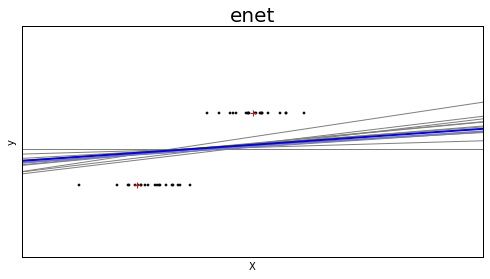

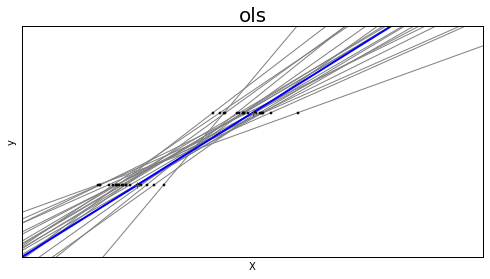

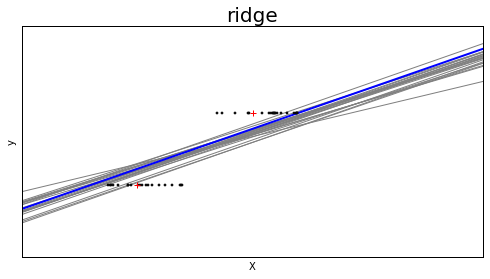

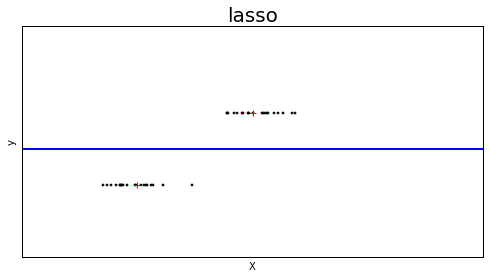

In [61]:
X_train = np.c_[.5, 1].T
y_train = [.5, 1]
X_test = np.c_[0, 2].T

np.random.seed(0)

classifiers = dict(ols=linear_model.LinearRegression(),
                   lasso=linear_model.Lasso(alpha=.1),ridge=linear_model.Ridge(alpha=.1),enet=linear_model.ElasticNet(alpha=0.1))

fignum = 1
for name, clf in classifiers.items():
    fig = plt.figure(fignum, figsize=(8, 4))
    plt.clf()
    #title = plt.title(name, size=20.)

    ax = plt.axes([.12, .12, .8, .8])
    plt.text(0.5, 1.02, name,
         horizontalalignment='center',
         fontsize=20,
         transform = ax.transAxes)
    for _ in range(20):
        this_X = .1 * np.random.normal(size=(2, 1)) + X_train
        clf.fit(this_X, y_train)

        ax.plot(X_test, clf.predict(X_test), color='.5')
        ax.scatter(this_X, y_train, s=3, c='.5', marker='o', zorder=10)

    clf.fit(X_train, y_train)
    ax.plot(X_test, clf.predict(X_test), linewidth=2, color='blue')
    ax.scatter(X_train, y_train, s=30, c='r', marker='+', zorder=10)

    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_ylim((0, 1.6))
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.set_xlim(0, 2)
    fignum += 1

plt.show()

###Feature selection with Regularized Regression: Advantages and Limitations

In [ ]:
from sklearn.linear_model import MultiTaskLasso, Lasso, Ridge, ElasticNet, LinearRegression

rng = np.random.RandomState(42)

# Generate some 2D coefficients with sine waves with random frequency and phase
n_samples, n_features, n_points = 100, 30, 40 #l, m, n
n_relevant_features = 1
coef = np.zeros((n_points, n_features)) # a nXm matrix, where n is the length in phase space

# Build a linear space of times ranging between 0 and 2pi
times = np.linspace(0, 2 * np.pi, n_points)

#This section constructs n_relevant features of length n_tasks. A small amount of noise is added to each one.
for k in range(n_relevant_features):
    coef[:, k] = np.sin((1. + rng.randn(1)) * times + 3 * rng.randn(1))

#Each feature is a somewhat imperfect sinusoid function
plt.plot(coef[:,0])

# Here we construct a dataset that projects our sinusoidal functions onto a random basis. 
# This is an approximation to a Reproducing Kernel Hilbert Space (see attachment). (RKHS)

#create the random basis. This is a l X m matrix. We need to create l samples in the basis space.
X = rng.randn(n_samples, n_features)

#Here we take the projection of the data into the basis space. We take X (l X m) * coef.T (m x n). 
# (another option is coef(n X m) * X.T (m X l) which wields a nXl matrix(points X samples))
#We also add a small noise factor to this as well. 

Y = np.dot(X, coef.T) + rng.randn(n_samples, n_points)

# We regress against the columns of the Y, which indicate a projection of the data into the random basis, using the 
# random basis itself as the data set. What will be returned is the coefficient required for each member of the random
# basis to correctly form the function. 
# This method is, in a sense, much like PCA except we are creating the principal components that we regress with.


coef_lasso_ = np.array([Lasso(alpha=1.).fit(X, y).coef_ for y in Y.T])
coef_ridge_ = np.array([Ridge(alpha=1.).fit(X, y).coef_ for y in Y.T])
coef_enet_ = np.array([ElasticNet(alpha=1.).fit(X, y).coef_ for y in Y.T])


###############################################################################


feature_to_plot = 1

fig = plt.figure(figsize=(14,8))
plt.plot(coef[:, feature_to_plot], 'k', label='Ground truth')
plt.plot(coef_lasso_[:, feature_to_plot], 'g', label='Lasso')
plt.plot(coef_ridge_[:, feature_to_plot],
         'r', label='Ridge')
plt.plot(coef_enet_[:, feature_to_plot],
         'b', label='Enet')

plt.legend(loc='upper center')
plt.axis('tight')
plt.ylim([-1.1, 1.1])
plt.show()

### QUIZ:
What is happening with the line shapes here? Can you describe them in terms of the unit ball?
What is happening with the line shapes furthest to the right and left of the chart?

## Alternative Methods of Regression

As implied above you can regress against any representation of your data that is consistent (with respect to the data). One needs only transform both the training and test set to the  new representation. 

Of particular note are:
1. Regressions against PCA (or other decomposition)
2. Kernelized Regressions (given below)

## PCA Regression: a treatment for multicollinearity

The use of PCA as a method to "fit" regressions has risen and waned in popularity over time. The basic idea (and it is remarkably hard to find a straight description of this outside of a regression textbook) is just to compute the PCA of the dataset ${\bf X}$ and then use $k$ components of the PCA to be new regressor variables. The method is as follows:

1. Compute ${\bf Z}$ (mean centered and scaled matrix) from X.
2. Compute PCA so that we find the PCA components ${\bf W} = {\bf ZV}$. The $j$th column of ${\bf W}$ is called the $j$th PC of ${\bf X}$.
3. Regress Y on the first (selected) $m$ PCs $\{W_{1}, W_{2}, W_{3}, \cdots W_{m}\}$, where $m \leq p$


PCA Regression has been touted in the past to be:
1. A cure for multicollinearity (we will discuss more in the near future) because the PCs are designed to be orthogonal. Supposedly this improves numerical accuracy (bias).
2. A representative regression of the data because no matter how many PCs are used to regress, all the features are represented in the PCs.


###QUIZ:
Why not all components?

In [60]:
df = pd.read_csv('data/housing_prices.csv')
X = df[['square_feet', 'num_rooms']].astype(float).values
y = df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pca = PCA().fit(X_train)
W = pca.transform(X_train)
Wp = pca.transform(X_test)

regr = LinearRegression()
regr.fit(W, y_train)
print "-----PCA-----"
print "Intercept:", regr.intercept_
print "Coefficients:", regr.coef_
print "R^2 error:", regr.score(Wp, y_test)



-----PCA-----
Intercept: 327058.846154
Coefficients: [  -125.45529967  15973.93356716]
R^2 error: 0.686197961806


It turns out that PCA is not the panacea that it has been cracked up to be for two primary reasons:
1. The first m principal components might be describing noise or system behavior and fail to account for variance in the target (or response variable)
2. The SSE has nothing to do with the magnitudes of the eigenvalues. Therefore you can have small eigenvalues and a vector that contributes only huge amounts of noise to the regression.

However you will continually find in the corporate world that professional statisticians believe that it eliminates multicollinearity. Since there are few other treatments, it's worth knowing about it. Sometimes it is very useful.